In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading data

In [2]:
df=pd.read_csv('data/order_data.csv')
userdf=pd.read_csv('data/user_data.csv')
dftest=pd.read_csv('data/test_data.csv')


# EDA

In [3]:
def df_summarier(df):
    a = df.isna().any(axis=0)
    b = df.dtypes
    c = df.nunique()
    d = pd.Series({col: df[col].unique() for col in df})
    e= df.count()
    print("df.shape", df.shape)
    # print("df.created_time.min()", df.created_time.min(), "df.created_time.max()", df.created_time.max(), )
    return pd.concat([a, b, c,d,e,df.describe().T], axis=1).rename(
        columns={0: "has nan?", 1: "dtypes", 2: "num of unique values", 3: "list of unique values",4: "num of notnan"}
    )

df_summarier(df)

df.shape (134128, 7)


,has nan?,dtypes,num of unique values,list of unique values,num of notnan,count,mean,std,min,25%,50%,75%,max
user_id,False,int64,1165,"[5016427010, 5771584023, 5959659075, 592773311...",134128,134128.0,5.008382e+09,7.709136e+08,2.690924e+09,4.456548e+09,5.122703e+09,5.697888e+09,6.005080e+09
merchant_id,False,int64,23,"[1496726697, 2893853168, 3205580255, 745550037...",134128,134128.0,1.586868e+09,4.396831e+08,2.570705e+07,1.496727e+09,1.496727e+09,1.496727e+09,9.461720e+09
order_amount,False,int64,1942,"[4000, 78800, 8060, 39600, 2360, 30000, 400, 8...",134128,134128.0,9.417106e+03,5.295510e+04,0.000000e+00,4.800000e+03,4.800000e+03,4.800000e+03,2.884400e+06
order_id,False,int64,134128,"[100166017603254865, 100166024803283018, 10016...",134128,134128.0,1.001665e+17,2.869861e+11,1.001660e+17,1.001663e+17,1.001665e+17,1.001668e+17,1.001670e+17
promo_amount,True,float64,62,"[nan, 2000.0, 4400.0, 59995.0, 5000.0, 4000.0,...",2105,2105.0,6.392261e+03,6.189537e+03,4.000000e+02,4.000000e+03,4.000000e+03,7.500000e+03,5.999500e+04
promo_type,True,object,3,"[nan, COUPON, SPIN_WHEEL, REFERRAL]",2105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_time,False,object,130046,"[2018-11-01 12:59:05, 2018-11-01 18:42:51, 201...",134128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['created_time']= pd.to_datetime(df['created_time'])
df['created_date'] = pd.to_datetime(df['created_time']).dt.date
df['created_month'] = df['created_date'].astype(str).str[:-3]
df['bin']=pd.cut(df['created_time'],bins=9)

In [5]:
# bin per 10 days
df.groupby('bin').order_id.count()

bin
(2018-10-31 22:22:50.963000064, 2018-11-11 03:07:36.333333248]     1383
(2018-11-11 03:07:36.333333248, 2018-11-21 05:41:22.666666752]     2530
(2018-11-21 05:41:22.666666752, 2018-12-01 08:15:09]               9438
(2018-12-01 08:15:09, 2018-12-11 10:48:55.333333248]              11415
(2018-12-11 10:48:55.333333248, 2018-12-21 13:22:41.666666752]    26549
(2018-12-21 13:22:41.666666752, 2018-12-31 15:56:28]              31234
(2018-12-31 15:56:28, 2019-01-10 18:30:14.333333248]              23576
(2019-01-10 18:30:14.333333248, 2019-01-20 21:04:00.666666752]    15087
(2019-01-20 21:04:00.666666752, 2019-01-30 23:37:47]              12916
Name: order_id, dtype: int64

<BarContainer object of 91 artists>

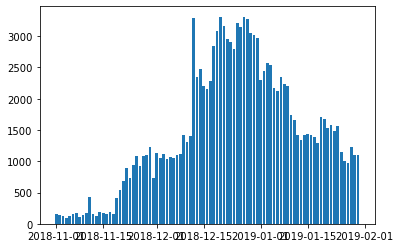

In [6]:
import matplotlib.pyplot as plt

plt.bar(df['created_date'].unique(), df.groupby('created_date').user_id.count())

In [7]:
df_summarier(df)

df.shape (134128, 10)


,has nan?,dtypes,num of unique values,list of unique values,num of notnan,count,mean,std,min,25%,50%,75%,max
user_id,False,int64,1165,"[5016427010, 5771584023, 5959659075, 592773311...",134128,134128.0,5.008382e+09,7.709136e+08,2.690924e+09,4.456548e+09,5.122703e+09,5.697888e+09,6.005080e+09
merchant_id,False,int64,23,"[1496726697, 2893853168, 3205580255, 745550037...",134128,134128.0,1.586868e+09,4.396831e+08,2.570705e+07,1.496727e+09,1.496727e+09,1.496727e+09,9.461720e+09
order_amount,False,int64,1942,"[4000, 78800, 8060, 39600, 2360, 30000, 400, 8...",134128,134128.0,9.417106e+03,5.295510e+04,0.000000e+00,4.800000e+03,4.800000e+03,4.800000e+03,2.884400e+06
order_id,False,int64,134128,"[100166017603254865, 100166024803283018, 10016...",134128,134128.0,1.001665e+17,2.869861e+11,1.001660e+17,1.001663e+17,1.001665e+17,1.001668e+17,1.001670e+17
promo_amount,True,float64,62,"[nan, 2000.0, 4400.0, 59995.0, 5000.0, 4000.0,...",2105,2105.0,6.392261e+03,6.189537e+03,4.000000e+02,4.000000e+03,4.000000e+03,7.500000e+03,5.999500e+04
promo_type,True,object,3,"[nan, COUPON, SPIN_WHEEL, REFERRAL]",2105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_time,False,datetime64[ns],130046,"[2018-11-01T12:59:05.000000000, 2018-11-01T18:...",134128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_date,False,object,91,"[2018-11-01, 2018-11-02, 2018-11-03, 2018-11-0...",134128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_month,False,object,3,"[2018-11, 2018-12, 2019-01]",134128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bin,False,category,9,"[(2018-10-31 22:22:50.963000064, 2018-11-11 03...",134128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pd.crosstab(df.promo_amount, df.promo_type, dropna=False).sum()

promo_type
COUPON        1011
REFERRAL         6
SPIN_WHEEL    1088
dtype: int64

# Dataset & Feature generation

I implemented:

- is_premium user
- num_merchant_transacted
- promo_rate (num of trx with promo / num of all trx)
- promo_amount_{max, min, mean}
- Tenure (customer length of relationship)
- features based on RFM:
  - Frequency:
    - mean days between order
    - mean weekly order amount
  - Monetary:
    - Mean order amount

Considered, but not yet implemented due to time constraint:

- Features based on CLV (for example: Average Transaction Size x Number of Transactions x Retention Period)
- Customer Trend: Increasing revenue, decreasing revenue or seesaw


In [9]:
def feature_engineering(df_full: pd.DataFrame, userdf: pd.DataFrame, dftest: pd.DataFrame):
    df_full=df_full.sort_values('created_time').reset_index()
    df_full['created_time']=pd.to_datetime(df_full['created_time'])
    df_full['created_date'] = pd.to_datetime(df_full['created_time']).dt.date
    dftest['last_trx_date']=pd.to_datetime(dftest['last_trx_date']).dt.date

    newdf=dftest[['user_id']]
    
    dfdepan = df_full[df_full['created_time'] < pd.to_datetime("2019-01-21")]
    df = dfdepan
    # df = df_full
    
    dfbelakang = df_full[df_full['created_time'] >= pd.to_datetime("2019-01-21")]
    newdf['churn'] = newdf.user_id.isin(dfbelakang.user_id.unique())

    df['previous_visit'] = df.groupby('user_id').created_time.shift()
    df['days_between_trx'] = df['created_time'] - df['previous_visit']
    df['days_between_trx'] = df['days_between_trx'].apply(lambda x: x.days)
    

    newerdf0=df.groupby('user_id').agg({
    "order_id":['count'],
    "order_amount": ['mean','sum'],
    "promo_amount": ['mean','sum','count', 'min','max'],
    })
    
    newerdf0.columns=newerdf0.columns.to_flat_index().str.join('_')
    newerdf = pd.merge(newdf,newerdf0,'left','user_id')
    newerdf = newerdf.set_index('user_id')
    newerdf['last_order']= df.groupby('user_id').created_time.max()
    newerdf['first_order']= df.groupby('user_id').created_time.min()
    newerdf['tenure']= newerdf['last_order'] - newerdf['first_order']
    newerdf['voucher_rate']=newerdf.promo_amount_count/newerdf.order_id_count
    newerdf2=newerdf
    newerdf2.tenure=newerdf2.tenure.dt.days
    newerdf2['days_between_trx_mean'] = df.groupby('user_id')['days_between_trx'].mean()
    # newerdf2['days_between_trx_max'] = df.groupby('user_id')['days_between_trx'].max()
    # newerdf2['days_between_trx_min'] = df.groupby('user_id')['days_between_trx'].min()
    newerdf2['num_merchant_id'] =  df.groupby(['user_id'])['merchant_id'].nunique()
    
    newerdf2['mean_weekly_trx_count']=df.groupby(['user_id', pd.Grouper(key='created_time', freq='W-MON')]).order_id.count().reset_index().groupby('user_id').mean()
    newerdf2['mean_weekly_order_amount']=df.groupby(['user_id', pd.Grouper(key='created_time', freq='W-MON')]).order_amount.mean().reset_index().groupby('user_id').mean()

    # newerdf2['mean_daily_trx_count']=df.groupby(['user_id', pd.Grouper(key='created_time', freq='D-MON')]).order_id.count().reset_index().groupby('user_id').mean()
    # newerdf2['mean_daily_order_amount']=df.groupby(['user_id', pd.Grouper(key='created_time', freq='D-MON')]).order_amount.mean().reset_index().groupby('user_id').mean()
    
    # imputation
    
    newerdf2['mean_weekly_trx_count'].fillna(0, inplace=True)
    newerdf2['mean_weekly_order_amount'].fillna(0, inplace=True)

    # newerdf2['mean_daily_trx_count'].fillna(0, inplace=True)
    # newerdf2['mean_daily_order_amount'].fillna(0, inplace=True)
    
    newerdf2['promo_amount_mean']=newerdf2['promo_amount_mean'].fillna(0)
    newerdf2['promo_amount_min']=newerdf2['promo_amount_min'].fillna(0)
    newerdf2['promo_amount_max']=newerdf2['promo_amount_max'].fillna(0)
    newerdf2['promo_amount_count']=newerdf2['promo_amount_count'].fillna(0)
    newerdf2['order_id_count']=newerdf2['order_id_count'].fillna(0)
    newerdf2['order_amount_mean']=newerdf2['order_amount_mean'].fillna(0)
    newerdf2['order_amount_sum']=newerdf2['order_amount_sum'].fillna(0)
    newerdf2['promo_amount_sum']=newerdf2['promo_amount_sum'].fillna(0)
    newerdf2['tenure']=newerdf2['tenure'].fillna(0)
    newerdf2['tenure2']=newerdf2['tenure'].fillna(0)
    newerdf2['voucher_rate']=newerdf2['voucher_rate'].fillna(0)
    newerdf2['num_merchant_id'].fillna(0,inplace=True)

    newerdf2['days_between_trx_mean'] =newerdf2['days_between_trx_mean'].fillna(newerdf2['days_between_trx_mean'].max())
    # newerdf2['days_between_trx_max'] = newerdf2['days_between_trx_max'].fillna(newerdf2['days_between_trx_max'].max())
    # newerdf2['days_between_trx_min'] = newerdf2['days_between_trx_min'].fillna(newerdf2['days_between_trx_max'].max())

    newerdf2['is_premium_user'] = userdf.set_index('user_id').is_premium_user
    newerdf2['strata']= np.where(newerdf2['is_premium_user'], 'premium', 'jelata')
    newerdf2['used_voucher']= np.where(newerdf2['voucher_rate']>0, 1, 0)
    
    return newerdf2

In [10]:
df_engineered=feature_engineering(df,userdf,dftest)
df_engineered.head()

C:\Users\mrlut\AppData\Local\Temp/ipykernel_29040/2186568671.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous_visit'] = df.groupby('user_id').created_time.shift()
C:\Users\mrlut\AppData\Local\Temp/ipykernel_29040/2186568671.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_between_trx'] = df['created_time'] - df['previous_visit']
C:\Users\mrlut\AppData\Local\Temp/ipykernel_29040/2186568671.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,churn,order_id_count,order_amount_mean,order_amount_sum,promo_amount_mean,promo_amount_sum,promo_amount_count,promo_amount_min,promo_amount_max,last_order,...,tenure,voucher_rate,days_between_trx_mean,num_merchant_id,mean_weekly_trx_count,mean_weekly_order_amount,tenure2,is_premium_user,strata,used_voucher
user_id,,,,,,,,,,,,,,,,,,,,,
3057937196,False,109.0,4937.064220,538140.0,3000.0,6000.0,2.0,2000.0,4000.0,2019-01-03 12:41:13,...,16.0,0.018349,0.009259,2.0,36.333333,8358.796622,16.0,1,premium,1
3725777565,True,313.0,5300.725240,1659127.0,0.0,0.0,0.0,0.0,0.0,2019-01-19 14:28:42,...,79.0,0.000000,0.092949,1.0,26.083333,5757.529199,79.0,0,jelata,0
3850602392,True,180.0,5406.666667,973200.0,0.0,0.0,0.0,0.0,0.0,2019-01-20 19:23:05,...,35.0,0.000000,0.117318,1.0,30.000000,5333.641975,35.0,1,premium,0
4218672051,False,110.0,23777.245455,2615497.0,0.0,0.0,0.0,0.0,0.0,2019-01-04 11:29:00,...,57.0,0.000000,0.366972,2.0,13.750000,52496.860925,57.0,1,premium,0
4300836811,False,106.0,9946.415094,1054320.0,0.0,0.0,0.0,0.0,0.0,2019-01-17 21:23:00,...,63.0,0.000000,0.457143,1.0,13.250000,16651.818182,63.0,0,jelata,0


In [11]:
df_summarier(df_engineered)

df.shape (1176, 21)


,has nan?,dtypes,num of unique values,list of unique values,num of notnan,count,mean,std,min,25%,50%,75%,max
churn,False,bool,2,"[False, True]",1176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id_count,False,float64,254,"[109.0, 313.0, 180.0, 110.0, 106.0, 227.0, 125...",1176,1176.0,103.224490,1.058867e+02,0.0,6.000000,105.000000,1.492500e+02,7.270000e+02
order_amount_mean,False,float64,1083,"[4937.064220183486, 5300.725239616613, 5406.66...",1176,1176.0,16169.748187,4.629107e+04,0.0,5425.430262,6884.062671,1.892200e+04,1.287596e+06
order_amount_sum,False,float64,1080,"[538140.0, 1659127.0, 973200.0, 2615497.0, 105...",1176,1176.0,940326.297619,4.552346e+06,0.0,116100.000000,619403.000000,1.032231e+06,1.210341e+08
promo_amount_mean,False,float64,163,"[3000.0, 0.0, 4000.0, 6598.888888888889, 8800....",1176,1176.0,2194.917725,5.786602e+03,0.0,0.000000,0.000000,3.935714e+03,5.999500e+04
promo_amount_sum,False,float64,158,"[6000.0, 0.0, 4000.0, 118780.0, 44000.0, 9900....",1176,1176.0,8509.397109,2.171401e+04,0.0,0.000000,0.000000,4.615000e+03,2.412200e+05
promo_amount_count,False,float64,29,"[2.0, 0.0, 1.0, 18.0, 5.0, 13.0, 7.0, 8.0, 4.0...",1176,1176.0,1.393707,3.981736e+00,0.0,0.000000,0.000000,1.000000e+00,5.200000e+01
promo_amount_min,False,float64,20,"[2000.0, 0.0, 4000.0, 9900.0, 2952.0, 4960.0, ...",1176,1176.0,1522.127551,5.015776e+03,0.0,0.000000,0.000000,2.000000e+03,5.999500e+04
promo_amount_max,False,float64,23,"[4000.0, 0.0, 19600.0, 10000.0, 9900.0, 4960.0...",1176,1176.0,3271.883503,7.853832e+03,0.0,0.000000,0.000000,4.000000e+03,5.999500e+04
last_order,True,datetime64[ns],1159,"[2019-01-03T12:41:13.000000000, 2019-01-19T14:...",1164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Model fitting

<lifelines.CoxPHFitter: fitted with 1176 total observations, 557 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
      baseline estimation = breslow
   number of observations = 1176
number of events observed = 619
   partial log-likelihood = -3406.84
         time fit was run = 2022-04-10 20:09:08 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
days_between_trx_mean     -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01
is_premium_user            0.02       1.02       0.10            -0.17             0.21                 0.85                 1.23
mean_weekly_order_amount  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
mean_weekly_trx_count      0.08       1.09       0.00             0.07             0.09                 1.08                 1.10
num_merchant_id           -0.04       0.97       0.04            -0.11             0.04                 0.89                 1.04
order_amount_mean          0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
order_amount_sum           0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
order_id_count            -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
promo_amount_max           0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
promo_amount_mean         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
promo_amount_min           0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
promo_amount_sum          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
voucher_rate               0.19       1.21       0.66            -1.11             1.49                 0.33                 4.44

                           cmp to      z      p   -log2(p)
covariate                                                 
days_between_trx_mean        0.00  -1.01   0.31       1.68
is_premium_user              0.00   0.22   0.83       0.27
mean_weekly_order_amount     0.00  -4.51 <0.005      17.23
mean_weekly_trx_count        0.00  16.85 <0.005     209.09
num_merchant_id              0.00  -0.88   0.38       1.40
order_amount_mean            0.00   3.82 <0.005      12.88
order_amount_sum             0.00   2.03   0.04       4.58
order_id_count               0.00 -11.63 <0.005     101.49
promo_amount_max             0.00   0.56   0.58       0.79
promo_amount_mean            0.00  -0.70   0.49       1.04
promo_amount_min             0.00   0.18   0.86       0.22
promo_amount_sum             0.00  -1.69   0.09       3.47
voucher_rate                 0.00   0.29   0.77       0.37
---
Concordance = 0.76
Partial AIC = 6839.68
log-likelihood ratio test = 284.23 on 13 df
-log2(p) of ll-ratio test = 173.81

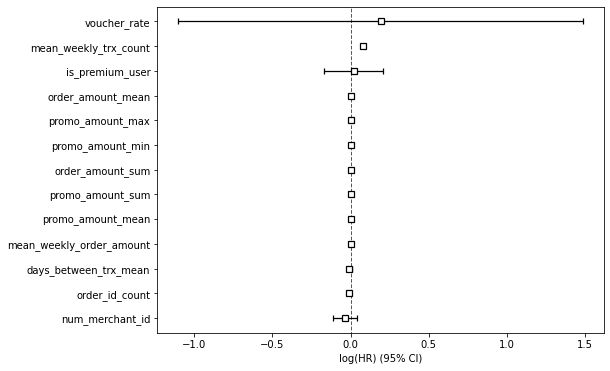

In [12]:
from lifelines import CoxPHFitter

formula="mean_weekly_trx_count + mean_weekly_order_amount + num_merchant_id + voucher_rate+ order_id_count + order_amount_mean + order_amount_sum + promo_amount_mean + promo_amount_sum + promo_amount_min + promo_amount_max + is_premium_user  + days_between_trx_mean"


cph = CoxPHFitter().fit(
    df_engineered, 'tenure', 'churn', 
    formula=formula)

cph.print_summary()
ax = plt.subplots(figsize=(8, 6))
cph.plot(ax=ax[1])
dfpred=cph.predict_survival_function(df_engineered)
dfpred.index=dfpred.index.astype(int)



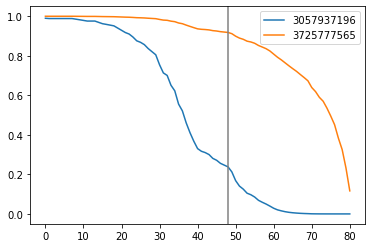

In [13]:
dfpred.T.head(2).T.plot()
plt.axvline(x=48,color='gray')

In [14]:
dfpred[47:48].T

,48
3057937196,0.237823
3725777565,0.917395
3850602392,0.595711
4218672051,0.927582
4300836811,0.812594
...,...
5973724450,0.874769
5975556055,0.696459
5978755512,0.521655
5988351018,0.838668


In [15]:
dftest2 = dftest.set_index('user_id')

In [16]:
dftest2['churn_proba']=1-dfpred[47:48].T

In [17]:
dftest2['churn_label']=round(1-dfpred[47:48].T).astype(int)

In [18]:
dftest2.to_csv('submission.csv')

# Unit tests

## Unit tests for feature engineering

In [19]:
df_unit_test=feature_engineering(df, userdf.head(), dftest.head())
df_unit_test

C:\Users\mrlut\AppData\Local\Temp/ipykernel_29040/2186568671.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['last_trx_date']=pd.to_datetime(dftest['last_trx_date']).dt.date
C:\Users\mrlut\AppData\Local\Temp/ipykernel_29040/2186568671.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous_visit'] = df.groupby('user_id').created_time.shift()
C:\Users\mrlut\AppData\Local\Temp/ipykernel_29040/2186568671.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,churn,order_id_count,order_amount_mean,order_amount_sum,promo_amount_mean,promo_amount_sum,promo_amount_count,promo_amount_min,promo_amount_max,last_order,...,tenure,voucher_rate,days_between_trx_mean,num_merchant_id,mean_weekly_trx_count,mean_weekly_order_amount,tenure2,is_premium_user,strata,used_voucher
user_id,,,,,,,,,,,,,,,,,,,,,
3057937196,False,109,4937.064220,538140,3000.0,6000.0,2,2000.0,4000.0,2019-01-03 12:41:13,...,16,0.018349,0.009259,2,36.333333,8358.796622,16,NaN,premium,1
3725777565,True,313,5300.725240,1659127,0.0,0.0,0,0.0,0.0,2019-01-19 14:28:42,...,79,0.000000,0.092949,1,26.083333,5757.529199,79,NaN,premium,0
3850602392,True,180,5406.666667,973200,0.0,0.0,0,0.0,0.0,2019-01-20 19:23:05,...,35,0.000000,0.117318,1,30.000000,5333.641975,35,NaN,premium,0
4218672051,False,110,23777.245455,2615497,0.0,0.0,0,0.0,0.0,2019-01-04 11:29:00,...,57,0.000000,0.366972,2,13.750000,52496.860925,57,NaN,premium,0
4300836811,False,106,9946.415094,1054320,0.0,0.0,0,0.0,0.0,2019-01-17 21:23:00,...,63,0.000000,0.457143,1,13.250000,16651.818182,63,NaN,premium,0


In [20]:
assert set(df_unit_test.columns) == {'churn',
 'days_between_trx_mean',
 'first_order',
 'is_premium_user',
 'last_order',
 'mean_weekly_order_amount',
 'mean_weekly_trx_count',
 'num_merchant_id',
 'order_amount_mean',
 'order_amount_sum',
 'order_id_count',
 'promo_amount_count',
 'promo_amount_max',
 'promo_amount_mean',
 'promo_amount_min',
 'promo_amount_sum',
 'strata',
 'tenure',
 'tenure2',
 'used_voucher',
 'voucher_rate'}

## Unit tests for prediction

In [58]:
cph_unit_test = CoxPHFitter().fit(
    df_unit_test, 'tenure', 'churn', formula=formula)

on seen data

In [60]:
cph_unit_test.predict_survival_function(df_unit_test)

,3057937196,3725777565,3850602392,4218672051,4300836811
16.0,1.000000,1.000000,1.000000,1.000000,1.000000
35.0,0.778801,0.778801,0.778801,0.778801,0.778801
57.0,0.778801,0.778801,0.778801,0.778801,0.778801
63.0,0.778801,0.778801,0.778801,0.778801,0.778801
79.0,0.286505,0.286505,0.286505,0.286505,0.286505


on unseen data (it accepts dataframe instead of plain dictionary)

In [61]:
cph_unit_test.predict_survival_function(pd.DataFrame([{'churn': False,
 'order_id_count': 0,
 'order_amount_mean': 0,
 'order_amount_sum': 0,
 'promo_amount_mean': 0,
 'promo_amount_sum': 0,
 'promo_amount_count': 0,
 'promo_amount_min': 0,
 'promo_amount_max': 0,
 'tenure': 0,
 'voucher_rate': 0,
 'days_between_trx_mean': 0,
 'num_merchant_id': 0,
 'mean_weekly_trx_count': 0,
 'mean_weekly_order_amount': 0,
 'tenure2': 0,
 'is_premium_user': np.nan,
 'strata': 'premium',
 'used_voucher': 1}]))

,0
16.0,1.000000
35.0,0.778801
57.0,0.778801
63.0,0.778801
79.0,0.286505
